<table style="width: 100%; margin-left: auto; margin-right: auto;" border="0">
    <tr>
        <td rowspan="3"> <img src="brasao_ufrn.png" width="150"/> </td>
        <td style="text-align: center">  Escola de Ciências e Tecnologia </td>
        <td rowspan="3" style="text-align: center"> UFRN<br> CT<br> PPGEMECA </td>
    </tr>
    <tr>
        <td style="text-align: center"> PPGEMECA - Percepção Robótica </td>
    </tr>
    <tr>
        <td>
            <p style="text-align: left;">Prof. Bruno Silva<br>
                                         Prof. Marcelo Nogueira</p>
        </td>
    </tr>
</table>

## Features em Imagens I

- Aplicações de Visão Computacional/Percepção Robótica depende da presença
  de características (**features**) em imagens
- Características visuais:
    - Qualquer padrão de dados facilmente detectável em imagens
    - Podem ser locais ou globais

## Features em Imagens II

- Características visuais locais - dizem respeito a regiões na imagem:
    - Cantos (*corners*)
    - Pontos característicos (*keypoints*)
    - Contornos
    - Retas, círculos ou elipses (formas paramétricas)
    - Regiões distintivas (*patches*)
    - etc.
- Características visuais globais - dizem respeito à imagem como um todo:
    - Dados de cor/intensidade: média, variância, mediana, etc.
    - Histograma: distribuição estatística dos valores dos pixels em algum espaço de cor
    - Medidas de textura (ex. entropia)
    - etc.

## Features em Imagens III

Neste curso, será dado ênfase em:

- Features locais
- Features do tipo pontos e regiões

Você deverá entender o motivo para que estas features sejam as mais adequadas
à área de Percepção Robótica nesta e na próxima aula

## Features em Imagens IV

Motivação: dado um conjunto de imagens...

<table border="0">
<tr><td><img src="22_features_em_imagens/aplicacao1.png" style="margin:auto; width: 800px;"/></td></tr>
<tr><td>Imagem de [4]</td></tr>
</table>

## Features em Imagens V

... como construir um mosaico (colagem de imagens)?

<table border="0">
<tr><td><img src="22_features_em_imagens/aplicacao2.png" style="margin:auto; width: 800px;"/></td></tr>
<tr><td>Imagem de [4]</td></tr>
</table>

## Features em Imagens VI

Quais das regiões abaixo podem ser consideradas features? Por que?

<table border="0">
<tr><td><img src="22_features_em_imagens/features_intuicao.png" style="margin:auto; width: 800px;"/></td></tr>
<tr><td>Imagem de [1]</td></tr>
</table>

## Features em Imagens VII

Features naturais:

- Geralmente encontradas em regiões de textura
- Por sua vez, regiões de textura em imagens possuem variações consideráveis nos níveis de intensidade da imagem

É preciso entender o que se quer dizer com variações na intensidade de uma imagem


## Variações na Intensidade da Imagem

O código a seguir exibe uma imagem e um perfil (gráfico)
da sua intensidade na linha correspondente à sua metade.

Observe como a intensidade ao longo da linha varia do 0 para o 255,
novamente para o 0, de novo do 0 para o 255 e por último para o 0.

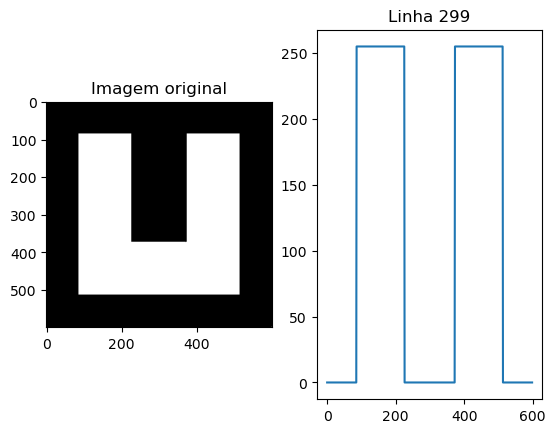

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

if __name__ == '__main__':

    img_name = 'samples/ushape.png'
    img = cv2.imread(img_name)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ind_meio = int(gray.shape[1]/2)
    lin_meio = gray[ind_meio, :] # linha do meio da imagem

    plt.subplot(121)
    plt.gca().set_title('Imagem original')
    plt.imshow(gray, cmap='gray')
    plt.subplot(122)
    plt.gca().set_title(f'Linha {ind_meio}')
    plt.plot(lin_meio)
    plt.show()

## Filtro Passa Altas I

Podemos utilizar o filtro tipo **passa altas** em uma imagem para calcular
as mudanças de intensidade que nela ocorrem

## Filtro Passa Altas II

**Filtros passa altas**:

- Realçam componentes de alta frequência em um sinal
- Em imagens:
  - Realçam regiões em que os níveis de intensidade variam
  - Estão relacionados com as derivadas espaciais da imagem
- Existem diversos tipos de filtro

## Detector de Bordas Sobel

Um exemplo de filtro passa altas para imagens é o filtro de Sobel:

- Possui dois kernels:
    - Filtro $G_x$: resulta na derivada da imagem de entrada ao longo de $x$
    - Filtro $G_y$: resulta na derivada da imagem de entrada ao longo de $y$ 
    
<table border="0">
<tr><td><img src="22_features_em_imagens/filtros_passa_altas1.png" style="margin:auto; width: 500px;"/></td></tr>
</table>

## OpenCV: Detector de Bordas Sobel

O código a seguir mostra como utilizar o detector de bordas Sobel (gradiente de 1a. ordem)
na biblioteca OpenCV.

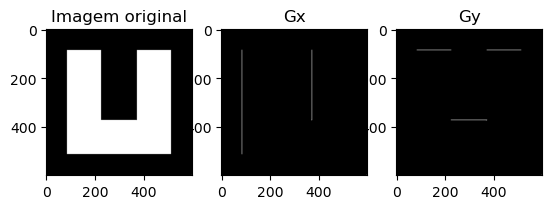

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

if __name__ == '__main__':

    img_name = 'samples/ushape.png'
    img = cv2.imread(img_name)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gx = cv2.Sobel(gray, -1, 1, 0) # -1: mantém o mesmo tipo da imagem original
    gy = cv2.Sobel(gray, -1, 0, 1) # 2o e 3o parâmetros: ordem de dx e dy

    plt.subplot(131)
    plt.gca().set_title('Imagem original')
    plt.imshow(gray, cmap='gray')
    plt.subplot(132)
    plt.gca().set_title('Gx')
    plt.imshow(gx, cmap='gray')
    plt.subplot(133)
    plt.gca().set_title('Gy')
    plt.imshow(gy, cmap='gray')
    plt.show()

## Detecção de Features do Tipo Cantos

Como devemos detectar regiões na imagem correspondente a features do tipo cantos (corners)?

## Detector de Cantos I

**Cantos** ou *corners*: projeções na imagem de elementos distintivos de uma cena

- Ocorrem localmente i.e. dentro de uma certa vizinhança de pixels onde
  existe um certo padrão de intensidade
- Não correspondem necessariamente a nenhuma geometria específica da cena
- Estas estruturas possuem propriedades que permitem que algoritmos consigam
  localizá-las/rastreá-las ao longo de diferentes imagens de uma mesma cena

## Detector de Cantos II

Padrões de intensidade para um canto, borda e região sem variação de intensidade.

<table border="0">
<tr><td><img src="22_features_em_imagens/gradientes.png" style="margin:auto; width: 800px;"/></td></tr>
<tr><td>Imagem de [1]</td></tr>
</table>

## Detector de Cantos III

**Como detectar cantos?**

Considere a matriz $C$ abaixo, calculada em função das derivadas espaciais $G_x$
e $G_y$, em torno de uma janela $w$ de um ponto $p$:

$$
C =
\begin{bmatrix}
\Sigma_w G_x^2   & \Sigma_w G_x G_y\\
\Sigma_w G_x G_y & \Sigma_w G_y^2
\end{bmatrix}
$$

Esta matriz caracteriza a estrutura da intensidade na vizinhança $w$ de $p$

## Detector de Cantos IV

Podemos prosseguir então com uma análise dos autovalores da matriz $C$.

Por ser simétrica, $C$ pode ser diagonalizada e vista como

$$
C =
\begin{bmatrix}
\lambda_0   & 0\\
0           & \lambda_1
\end{bmatrix},
$$

onde $\lambda_0$ e $\lambda_1$ são os seus autovalores.

## Detector de Cantos V

Considerando que os autovalores estão ordenados por valor
($\lambda_0 \ge \lambda_1$), podemos pensar em 3 casos distintos,
de acordo com a janela $w$ de um ponto $p$:

1. $w$ em uma região com intensidade próxima à uniforme: $G_x$ e $G_y$ estarão próximos de 0 e portanto, $\lambda_0 = \lambda_1 \approx 0$
2. $w$ em uma região de borda: o maior autovalor $\lambda_0$ possui autovetor associado na direção normal à borda e $\lambda_1$ será próximo a 0
3. $w$ em uma região de canto: $G_x$ e $G_y$ serão altos e assim $\lambda_0 \ge \lambda_1 \gt 0$

## Detector de Cantos VI

Assim, calculando os autovalores $\lambda_0$ e $\lambda_1$ de $C$,

**o ponto $p$ será um canto caso o menor autovalor $\lambda_1$ possua
valor alto o suficiente** 

## Detector de Cantos VII

Matematicamente, é possível utilizar algumas estratégias:

- Comparar $\lambda_1$ com um limiar $\tau$ (parâmetro do algoritmo)
- Calcular $\text{det}(C) - \alpha \text{tr}(C)^2 = \lambda_0 \lambda_1 - \alpha(\lambda_0 + \lambda_1)^2$ e comparar com um limiar $\alpha$ (parâmetro do algoritmo)

## Detector de Cantos VIII

O algoritmo pode ser resumido como segue:

```
1. Compute os gradientes Gx e Gy da imagem de entrada
2. Para cada ponto p da imagem:
    a. construa a matriz C em uma vizinhança w de p
    b. compute os autovalores de C
    c. utilize uma das estratégias do slide anterior para determinar se p é um ponto
       e o adicione a uma lista de pontos se for o caso
3. Processe a lista de pontos para remover pontos muito próximos:
    a. ordene pela intensidade do ponto (menor autovalor) e remova os menores
    b. ordene pelas coordenadas do ponto e remova pontos vizinhos (non-maximal suppression)
```

## Detector de Cantos: Características

O detector de cantos apresentado:

- É conhecido como detector de cantos de Harris [5,6]
- É invariante a translações e rotações

## Outras Features I

Outras features: linhas retas (achadas em ambientes construídos pelo homem):
útil para Percepção Robótica?

<table border="0">
<tr><td><img src="22_features_em_imagens/features_linhas.png" style="margin:auto; width: 800px;"/></td></tr>
<tr><td>Imagem de [1]</td></tr>
</table>

## Outras Features II

Outras features: regiões distintivas

- Invariantes à escala
- Parcialmente invariante à distorção perspectiva

<table border="0">
<tr><td><img src="22_features_em_imagens/features_mops.png" style="margin:auto; width: 800px;"/></td></tr>
<tr><td>Imagem de [1]</td></tr>
</table>

## Sumário

Nesta aula:

- Features em imagens
- Gradientes em imagens
- Análise de regiões de cantos (corners)
- Algoritmo para detecção de cantos

## Referências:

[1] Richard Szeliski. 2010. Computer Vision: Algorithms and Applications (1st. ed.). Springer-Verlag, Berlin, Heidelberg.

[2] Emanuele Trucco and Alessandro Verri. 1998. Introductory Techniques for 3-D Computer Vision. Prentice Hall PTR, USA.

[3] Adrian Kaehler and Gary Bradski. 2014. Learning OpenCV, 2nd Edition. O'Reilly Media, Inc.

[4] M. Brown, R. Szeliski and S. Winder. 2005. Multi-Image Matching using Multi-Scale Oriented Patches. 
International Conference on Computer Vision and Pattern Recognition (CVPR 2005). pages 510-517.

[5] C. Harris and M. Stephens. 1988. A Combined Corner and Edge Detector. Alvey Vision Conference. Vol. 15.

[6] J. Shi and C. Tomasi. 1994. Good features to track. International Conference on Computer Vision and Pattern Recognition (CVPR 1994). pages 593–600.